<h1><center> DS 300 Data Mining - PE 2 Classification </center></h1>

## Classification Exercises

#### Decision Tree Algorithm

A decision tree is a flowchart-like tree structure where an internal node represents feature (or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

![image](https://www.quotemaster.org/images/92/92558cf82706fcb46a06dded0c687a7b.jpg)

#### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content
The datasets consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Q1: Database and DataFrame

#### Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import sqlalchemy as db
import matplotlib.pyplot as plt
import seaborn as sns

#### Let's first create SQLite engine and read the 'data' Table into a variable named as 'data'. Data can be found at [link](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/diabetes.db), and you should upload it to the same directory of this notebook.

In [3]:
# Need to place the database file in the same directory of the notebook
engine = db.create_engine('sqlite:///diabetes.db')
connection = engine.connect()
metadata = db.MetaData()
data = db.Table('data', metadata, autoload = True, autoload_with = engine)

#### Use a query command to read all Table data into an array, and then convert the array into a DataFrame named `df`. 

In [4]:
query = db.select([data])
ResultProxy = connection.execute(query)
ResultSet = ResultProxy.fetchall()
df = pd.DataFrame(data=ResultSet, columns=ResultSet[0].keys())




In [5]:
# Display the final DataFrame
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


## Q2: Basic Info

#### Show DataFrame information

In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Display the basic statistics of the DataFrame

In [7]:
df.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Check for missing data.

In [8]:
df.isna().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Q3: EDA

#### Check the y labels to see if they are severely imbalanced.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

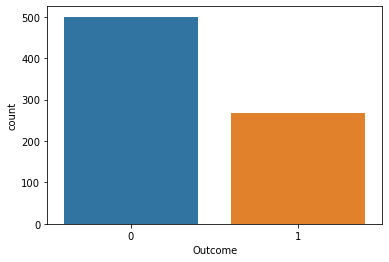

In [9]:
sns.countplot(x=df['Outcome'])



#### Visualize the scatter plot among all feature columns, use the 'Outcome' column as the third color-coded dimension.

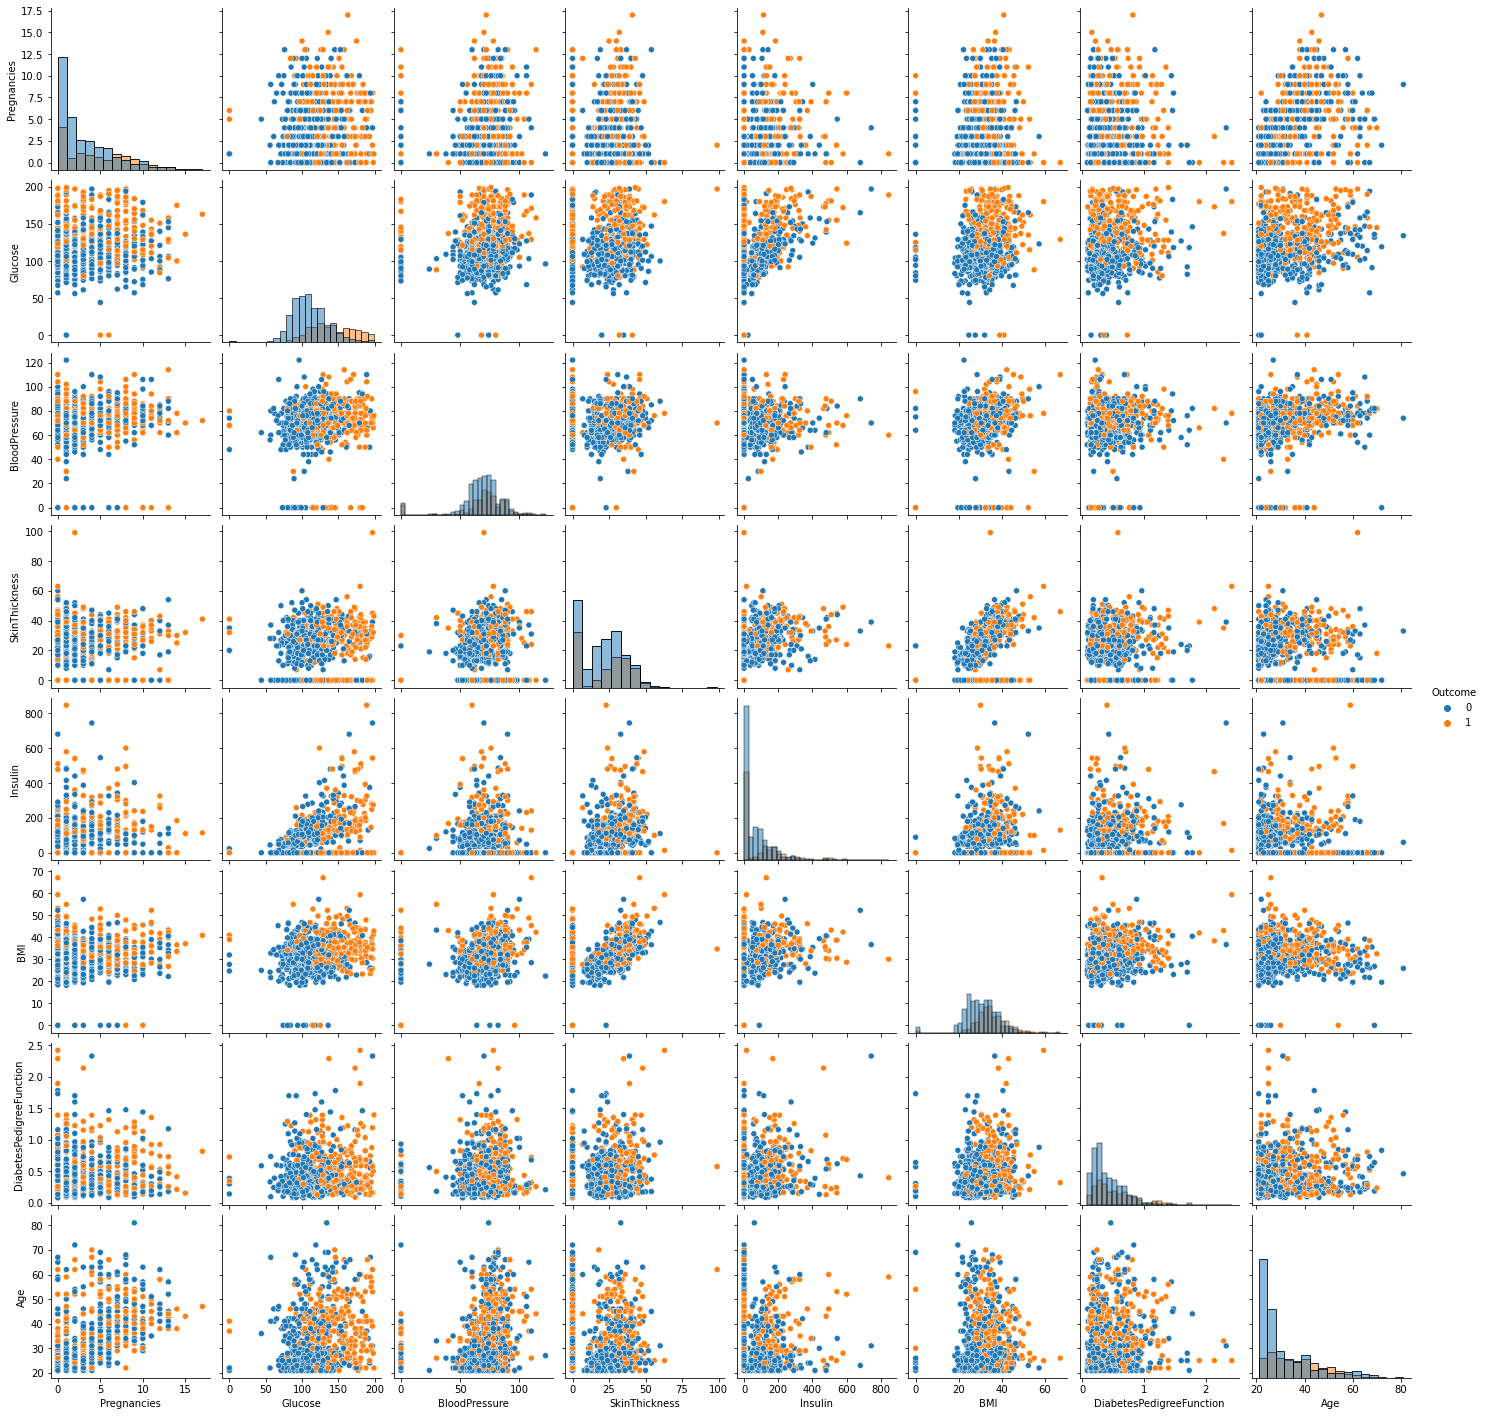

In [10]:
sns.pairplot(data=df, hue='Outcome', diag_kind='hist')



## Q4: Data Split

#### Prepare X, y vectors and split them into training set and testing set. Use training percentage = 80%, and random seed = 101.

In [11]:
X= df.drop(labels='Outcome', axis=1)

y= df['Outcome']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [14]:
# Show X_train
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
709,2,93,64,32,160,38.0,0.674,23
425,4,184,78,39,277,37.0,0.264,31
135,2,125,60,20,140,33.8,0.088,31
630,7,114,64,0,0,27.4,0.732,34
500,2,117,90,19,71,25.2,0.313,21


In [15]:
# Show y_train

y_train.head()

709    1
425    1
135    0
630    1
500    0
Name: Outcome, dtype: int64

## Q5: Modeling

#### Build a decision tree model with the default setting, and train it with the given data.

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test)





In [17]:
y_test.head()

766    1
748    1
42     0
485    1
543    0
Name: Outcome, dtype: int64

In [18]:
y_pred[:5]

array([1, 1, 0, 0, 0], dtype=int64)

## Q6: Evaluation

#### Evaluate the model with classification report and confusion matrix.

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))




[[77 26]
 [23 28]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       103
           1       0.52      0.55      0.53        51

    accuracy                           0.68       154
   macro avg       0.64      0.65      0.65       154
weighted avg       0.69      0.68      0.68       154



## Q7: Visualize decision trees

#### See the tutorial on function [`plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

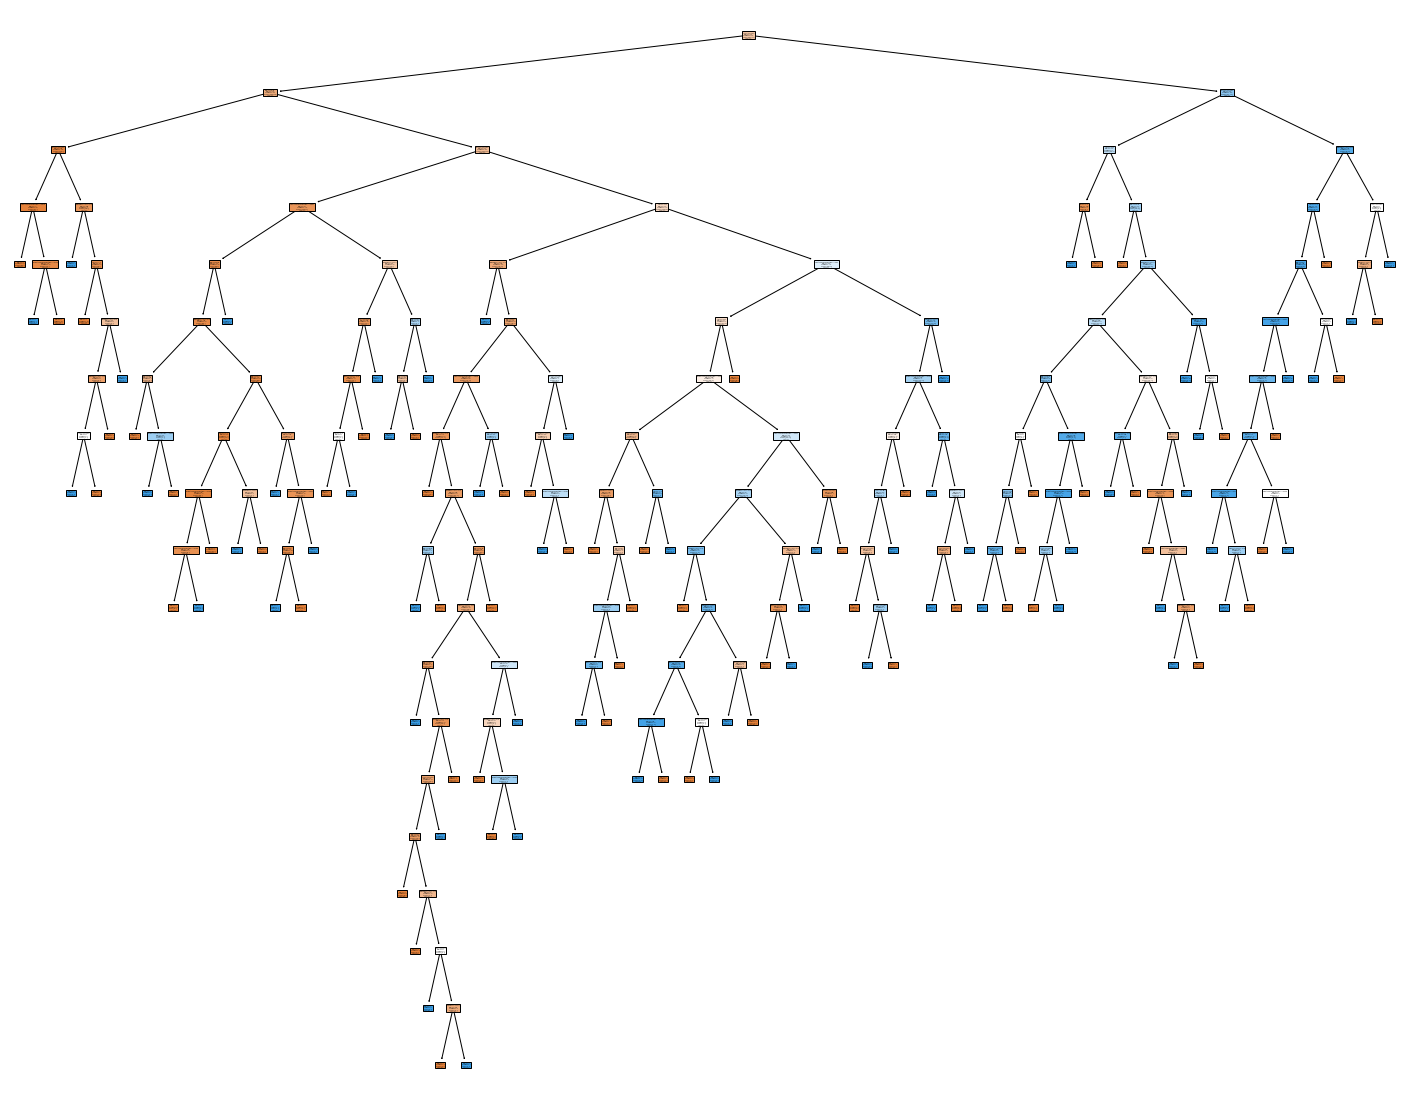

In [20]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, 
              feature_names=df.columns[:-1],  
              class_names=['0','1'],
              filled=True)

## Q8: Model Tuning

#### There are three key parameters to tune on a decision tree model:

+ criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

+ splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

+ max_depth : int or None, optional (default=None): The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In Scikit-learn, optimization of decision tree classifier is performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, you can also try other attribute selection measure such as entropy.

In [21]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf2 = clf2.fit(X_train.values,y_train.values)
y_pred2 = clf2.predict(X_test.values)
print(classification_report(y_test, y_pred2))








              precision    recall  f1-score   support

           0       0.77      0.91      0.84       103
           1       0.72      0.45      0.55        51

    accuracy                           0.76       154
   macro avg       0.74      0.68      0.69       154
weighted avg       0.75      0.76      0.74       154



#### Visualize the new model again

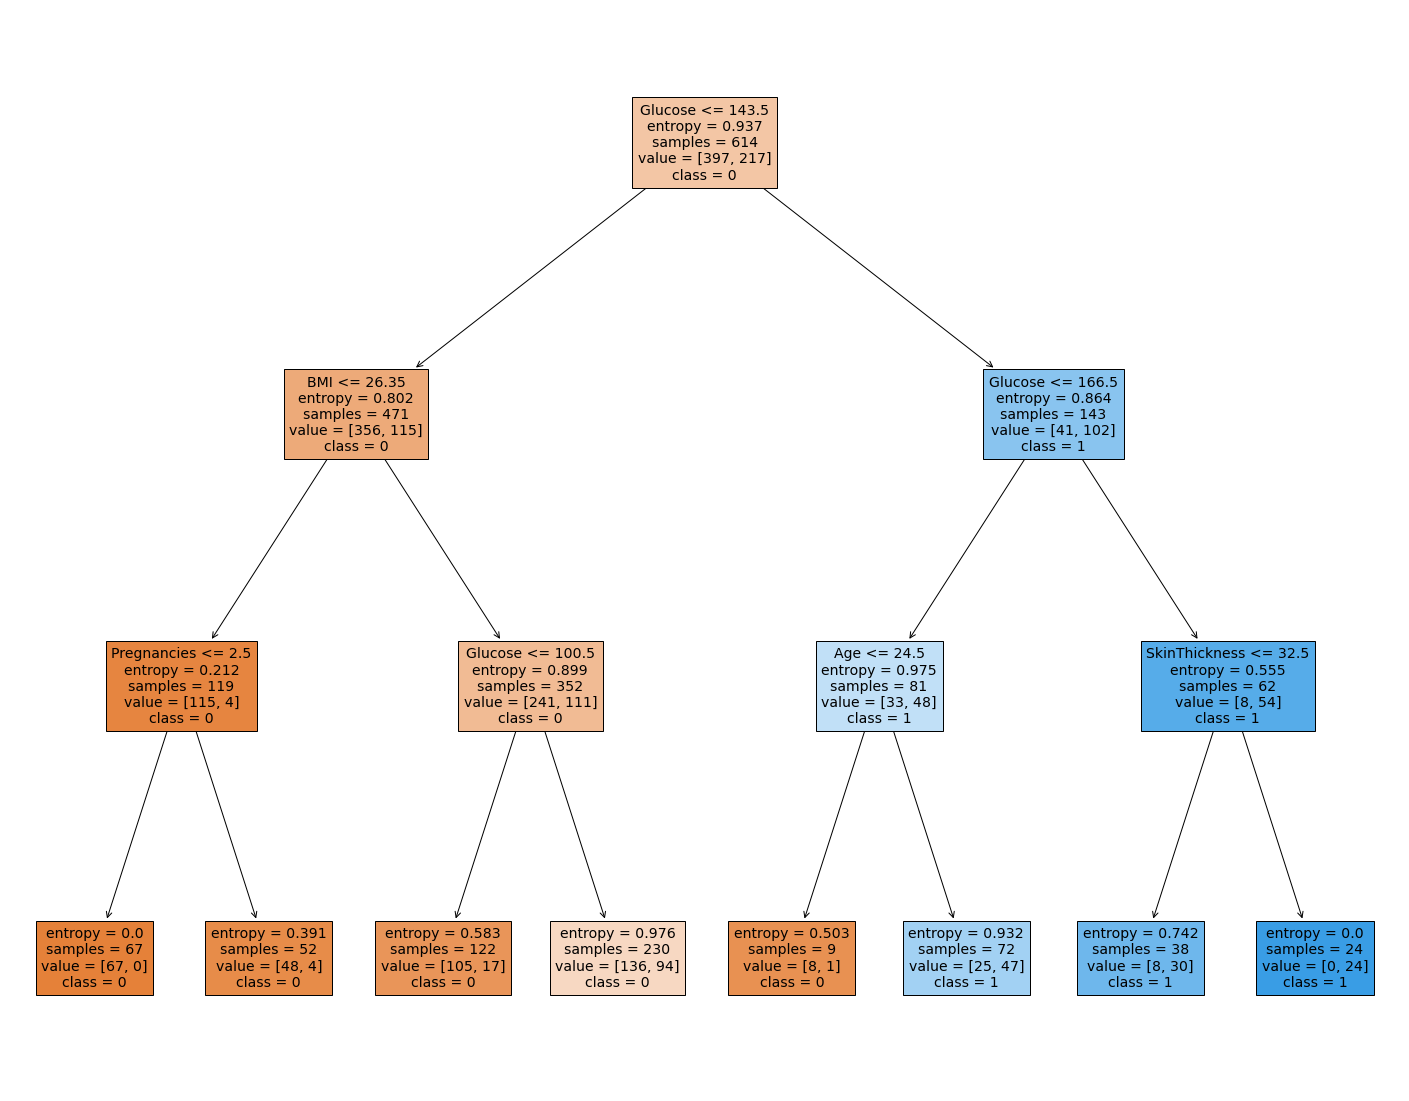

In [22]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf2, 
              feature_names=df.columns[:-1],  
              class_names=['0','1'],
              filled=True)



In [23]:
# Save the figure to a file
fig.savefig('PE2_tree_optimized.png')


## Q9: Try A Different Model

#### Use Gaussian Naive Bayes model to repeat the classification and evaluate the results.

In [24]:
# Import 
from sklearn.naive_bayes import GaussianNB


In [25]:
clf3 = GaussianNB()
clf3.fit(X_train.values, y_train.values)
y_pred3 = clf3.predict(X_test.values)
print(classification_report(y_test, y_pred3))




              precision    recall  f1-score   support

           0       0.82      0.81      0.81       103
           1       0.62      0.65      0.63        51

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.76      0.75      0.75       154



#### Show the probability of each y label class

In [26]:
clf3.class_prior_



array([0.6465798, 0.3534202])

## Q10: Further questions to ask:


#### When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model. That said, they have several advantages:

+ They are extremely fast for both training and prediction
+ They provide straightforward probabilistic prediction
+ They are often very easily interpretable
+ They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification. If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

+ When the naive assumptions actually match the data (very rare in practice)
+ For very well-separated categories, when model complexity is less important
+ For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall). This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

## Great job!

In [27]:
from sklearn.ensemble import BaggingClassifier

In [28]:
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                           n_estimators=20,
                           max_samples=0.8,
                           max_features=1.0,
                           bootstrap=True,
                           bootstrap_features=False,
                           oob_score=True,
                           warm_start=False,
                           n_jobs=2,
                           random_state=101,
                           verbose=0)

In [29]:
bag_clf.fit(X_train.values, y_train.values)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=20, n_jobs=2, oob_score=True, random_state=101)

In [30]:
bag_clf.oob_score_

0.739413680781759

In [31]:
y_pred_bag = bag_clf.predict(X_test.values)

In [32]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       103
           1       0.68      0.67      0.67        51

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.79      0.79       154



In [33]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=True,
    n_jobs=2,
    random_state=101,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

In [39]:
rf_clf.fit(X_train.values, y_train.values)

C:\Users\augus\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=5, max_features='auto', n_jobs=2,
                       oob_score=True, random_state=101)

In [40]:
y_pred_rf = rf_clf.predict(X_test.values)

In [41]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       103
           1       0.72      0.51      0.60        51

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.77      0.77      0.76       154

